
# Challenge 3: Artifical Neural Networks

<a target="_blank" href="https://colab.research.google.com/github/LucaPennella/Intro_to_ML_23-24/blob/main/challenges/challenge-three.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


Using Fully Connected Neural Networks and Convolutional Neural Networks, perform the following tasks on [this data set](https://pytorch.org/vision/stable/generated/torchvision.datasets.KMNIST.html#torchvision.datasets.KMNIST).
1. Data exploration.
2. For each architecture, tune the number of the hidden layers ($\le 3$), the optimizer, and some hyperparameters of your choice. How many tries to do is up to your discretion.
3. Summarise your results in a table and comment on them in the report.
4. For a model (not necessarily the best performing one), plot training loss vs testing loss and training accuracy vs testing accuracy, and comment on what you see.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

### 1. Data Epxloration

In [2]:
BATCH_SIZE= 32

In [3]:
# Download the Kuzushiji-MNIST dataset
data_transforms = transforms.ToTensor()

## download and load training dataset
trainset = torchvision.datasets.KMNIST(root='./data', train=True, download=True, transform=data_transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

## download and load testing dataset
testset = torchvision.datasets.KMNIST(root='./data', train=False, download=True, transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

100%|██████████| 18165135/18165135 [00:13<00:00, 1298632.63it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 203507.59it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:03<00:00, 827027.20it/s] 


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 14091100.05it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



Image dimensions: torch.Size([28, 28])
Batch dimensions: torch.Size([32, 1, 28, 28])


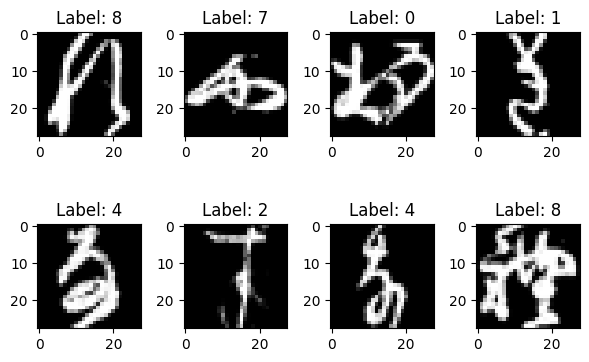

In [4]:
# Da quante immagine è formato il dataset, che dimensioni hanno?

print("Image dimensions:", trainset.data[0].shape)
for images, labels in trainloader:
    print("Batch dimensions:", images.shape)
    break

# Esempi di qualche immagine
num_row = 2
num_col = 4

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(trainset.data[i], cmap='gray')
    ax.set_title('Label: {}'.format(trainset.targets[i]))
plt.tight_layout()
plt.show()

### 2. Fully Connected Neaural Network
Tune the number of hidden layers, the optimizer, and some hyperparameter. (which one?)

In [ ]:
# One layer fully connected neural network

class OneLayerModel(nn.Module):

  def __init__(self):
    super(OneLayerModel,self).__init__()

    self.l1 = nn.Linear(28*28,10) # input: 1 immagine 29x28 pixel, output: 10 label

  def forward(self,x):
     x = x.flatten(start_dim=1)
     x = self.l1(x)

     return x


In [ ]:
# Two Layer fully connected neural network

class TwoLayerModel(nn.Module):

  def __init__(self):
    super(TwoLayerModel,self).__init__()

    self.l1 = nn.Linear(28*28,128)
    self.l2 = nn.Linear(128,10)

  def forward(self,x):
    x = x.flatten(start_dim=1)
    x = self.l1(x)
    x = F.relu(x)
    x = self.l2(x)

    return x

In [ ]:
# Three Layer fully connected

class ThreeLayerModel(nn.Module):

  def __init__(self):
    super(ThreeLayerModel, self).__init__()

    self.l1 = nn.Linear(28*28,128)
    self.l2 = nn.Linear(128,64)
    self.l3 = nn.Linear(64,10)

  def forward(self,x):
    x = x.flatten(start_dim=1)
    x = self.l1(x)
    x= F.relu(x)
    x = self.l2(x)
    x = F.relu(x)
    x = self.l3(x)

    return x


In [ ]:
# One Layer Convolutional Model

class CN1(nn.Module):

  def  __init__(self):
    super(CN1, self).__init__()

    self.conv1 = nn.Conv2d(in_channels= 1, out_channels= 2, kernel_size= 3)
    self.l1 = nn.Linear(2*26*26,128)
    self.l2 = nn.Linear(128,10)

  def forward(self,x):

    x = self.conv1(x)
    x = F.relu(x)
    x = x.flatten(start_dim = 1)
    x = self.l1(x)
    x = F.relu(x)
    x = self.l2(x)

    return x

In [5]:
class CN2(nn.Module):

  def __init__(self):
    super(CN2,self).__init__()

    self.conv1 = nn.Conv2d(in_channels= 1, out_channels= 2, kernel_size= 3)
    self.conv2 = nn.Conv2d(in_channels= 2, out_channels= 4, kernel_size= 3)
    self.l1 = nn.Linear(4*24*24,128)
    self.l2 = nn.Linear(128,10)

  def forward(self,x):

    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = x.flatten(start_dim = 1)
    x = self.l1(x)
    x = F.relu(x)
    x = self.l2(x)

    return x


In [ ]:
class CN3(nn.Module):

  def __init__(self):
    super(CN3,self).__init__()

    self.conv1 = nn.Conv2d(in_channels= 1, out_channels= 2, kernel_size= 3)
    self.conv2 = nn.Conv2d(in_channels= 2, out_channels= 4, kernel_size= 3)
    self.conv3 = nn.Conv2d(in_channels= 4, out_channels= 8, kernel_size= 3)
    self.l1 = nn.Linear(8*22*22,128)
    self.l2 = nn.Linear(128,10)

  def forward(self,x):

    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.conv3(x)
    x = F.relu(x)
    x = x.flatten(start_dim = 1)
    x = self.l1(x)
    x = F.relu(x)
    x = self.l2(x)

    return x

#### Training


In [6]:
#get the accuracy of one batch
def batch_accuracy(logit, target):
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects / target.size(0)
    return accuracy.item()

def compute_weight_norm(model):
    norm = 0.0
    for name, param in model.named_parameters():
      if "weight" in name:
        norm += torch.norm(param.data, p= 2)
    return norm.cpu().item()

In [7]:
def train_model(model, num_epochs, trainloader, criterion, optimizer):

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model = model.to(device)

    losses = []
    accuracy = []

    norms = []

    for epoch in range(num_epochs):
        train_loss = 0.0
        train_acc = 0.0

        # Set the model to training mode
        model = model.train()
        start = time()
        ## training step
        for i, (images, labels) in enumerate(trainloader):

            images = images.to(device)
            labels = labels.to(device)

            ## forward + backprop + loss
            logits = model(images)
            loss = criterion(logits, labels)

            # Reset the gradients to zero
            optimizer.zero_grad()

            loss.backward()

            ## update model params
            optimizer.step()

            train_loss += loss.item()
            train_acc += batch_accuracy(logits, labels)


        losses.append(train_loss / i)
        accuracy.append(train_acc/i)
        norms.append(compute_weight_norm(model))

        model.eval()
        print(f"Epoch: {epoch+1} | Loss: {train_loss / i:.4f} | Train Accuracy: {train_acc/i:.4f} | Time: {time()-start:.2f}")

    return losses, accuracy, norms

Plot di loss e accuracy per i modelli fully connected e convoluzionali

In [ ]:
OneLayerModel = OneLayerModel()

criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(OneLayerModel.parameters(), lr=0.001)
loss1, accuracy1, W_adam = train_model(OneLayerModel, 5, trainloader, criterion, optimizer)


Epoch: 1 | Loss: 0.7336 | Train Accuracy: 78.8054 | Time: 11.36
Epoch: 2 | Loss: 0.6080 | Train Accuracy: 82.1238 | Time: 11.05
Epoch: 3 | Loss: 0.5922 | Train Accuracy: 82.6107 | Time: 10.41
Epoch: 4 | Loss: 0.5826 | Train Accuracy: 82.8158 | Time: 11.98
Epoch: 5 | Loss: 0.5767 | Train Accuracy: 83.0376 | Time: 11.22


In [ ]:
TwoLayerModel = TwoLayerModel()

criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(TwoLayerModel.parameters(), lr=0.001)

loss2,accuracy2, W_adam = train_model(TwoLayerModel, 5, trainloader, criterion, optimizer)

Epoch: 1 | Loss: 0.4436 | Train Accuracy: 86.9747 | Time: 13.18
Epoch: 2 | Loss: 0.2173 | Train Accuracy: 93.6316 | Time: 13.28
Epoch: 3 | Loss: 0.1509 | Train Accuracy: 95.6210 | Time: 13.49
Epoch: 4 | Loss: 0.1132 | Train Accuracy: 96.7016 | Time: 13.36
Epoch: 5 | Loss: 0.0886 | Train Accuracy: 97.4236 | Time: 14.63


In [ ]:
ThreeLayerModel = ThreeLayerModel()

criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(ThreeLayerModel.parameters(), lr=0.001)

loss3, accuracy3, W_adam = train_model(ThreeLayerModel, 5, trainloader, criterion, optimizer)

Epoch: 1 | Loss: 0.4441 | Train Accuracy: 86.6129 | Time: 14.33
Epoch: 2 | Loss: 0.2067 | Train Accuracy: 93.8384 | Time: 14.53
Epoch: 3 | Loss: 0.1400 | Train Accuracy: 95.7661 | Time: 14.14
Epoch: 4 | Loss: 0.1050 | Train Accuracy: 96.8817 | Time: 14.05
Epoch: 5 | Loss: 0.0815 | Train Accuracy: 97.4837 | Time: 14.03


In [ ]:
CN1 = CN1()

criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(CN1.parameters(), lr=0.001)

loss_cn1, accuracy_cn1, W_adam = train_model(CN1, 5, trainloader, criterion, optimizer)

Epoch: 1 | Loss: 1.9037 | Train Accuracy: 26.5425 | Time: 22.32
Epoch: 2 | Loss: 0.2567 | Train Accuracy: 92.2625 | Time: 21.36
Epoch: 3 | Loss: 0.1659 | Train Accuracy: 95.0774 | Time: 22.11
Epoch: 4 | Loss: 0.1255 | Train Accuracy: 96.2563 | Time: 22.03
Epoch: 5 | Loss: 0.1026 | Train Accuracy: 96.9067 | Time: 22.34


In [ ]:
CN2 = CN2()

criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(CN2.parameters(), lr=0.001)

loss_cn2, accuracy_cn2, W_adam = train_model(CN2, 5, trainloader, criterion, optimizer)

Epoch: 1 | Loss: 0.4462 | Train Accuracy: 86.4461 | Time: 31.38
Epoch: 2 | Loss: 0.1828 | Train Accuracy: 94.5854 | Time: 32.89
Epoch: 3 | Loss: 0.1221 | Train Accuracy: 96.2797 | Time: 33.40
Epoch: 4 | Loss: 0.0888 | Train Accuracy: 97.2952 | Time: 35.20
Epoch: 5 | Loss: 0.0647 | Train Accuracy: 97.9889 | Time: 31.68


In [ ]:
CN3 = CN3()

criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(CN3.parameters(), lr=0.001)

loss_cn3, accuracy_cn3, W_adam = train_model(CN3, 5, trainloader, criterion, optimizer)

Epoch: 1 | Loss: 0.4556 | Train Accuracy: 86.0109 | Time: 44.14
Epoch: 2 | Loss: 0.1848 | Train Accuracy: 94.4654 | Time: 47.39
Epoch: 3 | Loss: 0.1214 | Train Accuracy: 96.4098 | Time: 47.67
Epoch: 4 | Loss: 0.0859 | Train Accuracy: 97.4486 | Time: 46.70
Epoch: 5 | Loss: 0.0626 | Train Accuracy: 98.1373 | Time: 46.01


Training con adam, grafico dell'accuracy e della loss dei tre modelli fully connected e dei tre convolutional.

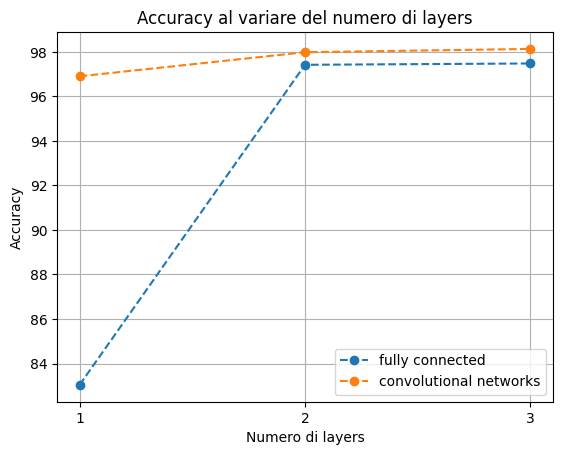

In [ ]:
# Plot dell'accuracy per fully connected networks e convolutional networks
num_layers = [1, 2, 3]
accuracies_fc = [accuracy1[-1],accuracy2[-1],accuracy3[-1]]
accuracies_cn = [accuracy_cn1[-1],accuracy_cn2[-1], accuracy_cn3[-1]]

fig, ax=plt.subplots()
ax.plot(num_layers, accuracies_fc, label = "fully connected",marker='o', linestyle='--')
ax.plot(num_layers, accuracies_cn, label = "convolutional networks",marker='o', linestyle='--')

plt.xlabel('Numero di layers')
plt.ylabel('Accuracy')
plt.title('Accuracy al variare del numero di layers')
plt.xticks(num_layers)
plt.grid(True)
ax.legend()

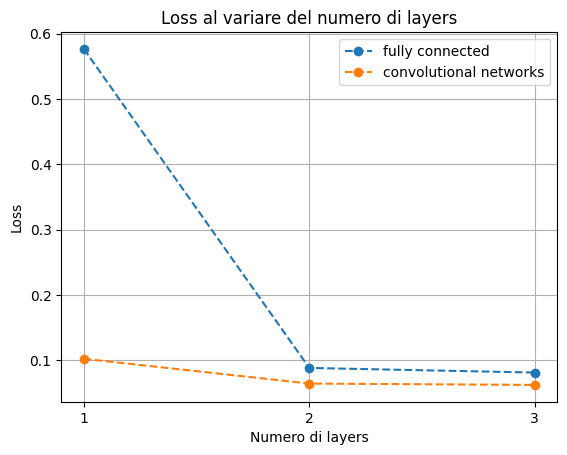

In [ ]:
# Plot della loss per fully connected networks e convolutional networks
num_layers = [1, 2, 3]
loss_fc = [loss1[-1],loss2[-1],loss3[-1]]
loss_cn = [loss_cn1[-1],loss_cn2[-1], loss_cn3[-1]]

fig, ax=plt.subplots()
ax.plot(num_layers, loss_fc, label = "fully connected",marker='o', linestyle='--')
ax.plot(num_layers, loss_cn, label = "convolutional networks",marker='o', linestyle='--')

plt.xlabel('Numero di layers')
plt.ylabel('Loss')
plt.title('Loss al variare del numero di layers')
plt.xticks(num_layers)
plt.grid(True)
ax.legend()

Come cambia l'attivazione:

In [ ]:
class TanhModel(nn.Module):

  def __init__(self):
    super(TanhModel, self).__init__()

    self.l1 = nn.Linear(28*28,128)
    self.l2 = nn.Linear(128,64)
    self.l3 = nn.Linear(64,10)

  def forward(self,x):
    x = x.flatten(start_dim=1)
    x = self.l1(x)
    x= F.tanh(x)
    x = self.l2(x)
    x = F.tanh(x)
    x = self.l3(x)
    x = F.tanh(x)

    return x

In [ ]:
class SigmoidModel(nn.Module):

  def __init__(self):
    super(SigmoidModel, self).__init__()

    self.l1 = nn.Linear(28*28,128)
    self.l2 = nn.Linear(128,64)
    self.l3 = nn.Linear(64,10)

  def forward(self,x):
    x = x.flatten(start_dim=1)
    x = self.l1(x)
    x= F.sigmoid(x)
    x = self.l2(x)
    x = F.sigmoid(x)
    x = self.l3(x)
    x = F.sigmoid(x)

    return x

In [ ]:
# Trainig modello con attivazione tanh
TanhModel = TanhModel()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(TanhModel.parameters(), lr=0.001)

loss_tanh, accuracy_tanh, W_adam = train_model(TanhModel, 5, trainloader, criterion, optimizer)

Epoch: 1 | Loss: 1.0869 | Train Accuracy: 85.4923 | Time: 14.70
Epoch: 2 | Loss: 0.9324 | Train Accuracy: 92.8162 | Time: 14.78
Epoch: 3 | Loss: 0.8952 | Train Accuracy: 94.8539 | Time: 14.62
Epoch: 4 | Loss: 0.8755 | Train Accuracy: 95.9412 | Time: 14.42
Epoch: 5 | Loss: 0.8620 | Train Accuracy: 96.6415 | Time: 14.55


In [ ]:
# Trainig modello con attivazione sigmoide
SigmoidModel = SigmoidModel()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(SigmoidModel.parameters(), lr=0.001)

loss_sigmoid, accuracy_sigmoid, W_adam = train_model(SigmoidModel, 5, trainloader, criterion, optimizer)

Epoch: 1 | Loss: 1.7699 | Train Accuracy: 72.0618 | Time: 14.92
Epoch: 2 | Loss: 1.5893 | Train Accuracy: 86.2827 | Time: 15.12
Epoch: 3 | Loss: 1.5508 | Train Accuracy: 89.8713 | Time: 14.47
Epoch: 4 | Loss: 1.5308 | Train Accuracy: 91.8490 | Time: 14.52
Epoch: 5 | Loss: 1.5186 | Train Accuracy: 93.3531 | Time: 14.42


Text(0.5, 1.0, 'Accuracy al variare della funzione di attivazione')

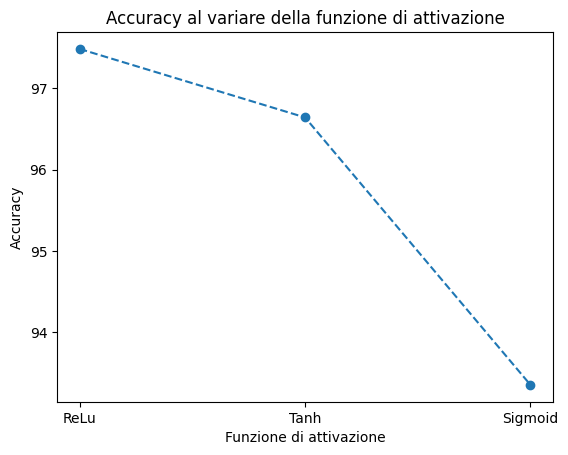

In [ ]:
# Plot dei diversi ottimizzatori
x = [1, 2, 3]
xi = ['ReLu', 'Tanh', 'Sigmoid']
activation_accuracy= [accuracy3[-1],accuracy_tanh[-1],accuracy_sigmoid[-1]]

plt.plot(x,activation_accuracy, marker='o', linestyle='--')
plt.xticks(x, xi)
plt.xlabel("Funzione di attivazione")
plt.ylabel("Accuracy")
plt.title("Accuracy al variare della funzione di attivazione")


Training con diversi ottimizzatori

In [ ]:
# Ottimizzazione stochastic gradient descent
ThreeLayerModel_sgd = ThreeLayerModel()

criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.SGD(ThreeLayerModel_sgd.parameters(), lr=0.001)

loss_sgd, accuracy_sgd, W_SGD = train_model(ThreeLayerModel_sgd, 5, trainloader, criterion, optimizer)

Epoch: 1 | Loss: 2.2621 | Train Accuracy: 22.1068 | Time: 13.93
Epoch: 2 | Loss: 2.0918 | Train Accuracy: 41.6639 | Time: 12.83
Epoch: 3 | Loss: 1.7960 | Train Accuracy: 49.2713 | Time: 12.62
Epoch: 4 | Loss: 1.4971 | Train Accuracy: 62.8769 | Time: 12.83
Epoch: 5 | Loss: 1.2421 | Train Accuracy: 69.0685 | Time: 13.04


In [ ]:
# Ottimizzazione stochastic gradient descent con momentum
ThreeLayerModel_sgdm = ThreeLayerModel()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ThreeLayerModel_sgdm.parameters(), lr=0.001, momentum = 0.9)

loss_sgdm, accuracy_sgdm, W_SGDm = train_model(ThreeLayerModel_sgdm, 5, trainloader, criterion, optimizer)

Epoch: 1 | Loss: 1.3981 | Train Accuracy: 59.3233 | Time: 13.51
Epoch: 2 | Loss: 0.5991 | Train Accuracy: 82.2655 | Time: 13.11
Epoch: 3 | Loss: 0.4746 | Train Accuracy: 85.7741 | Time: 12.92
Epoch: 4 | Loss: 0.4064 | Train Accuracy: 87.9386 | Time: 13.18
Epoch: 5 | Loss: 0.3579 | Train Accuracy: 89.5077 | Time: 14.40


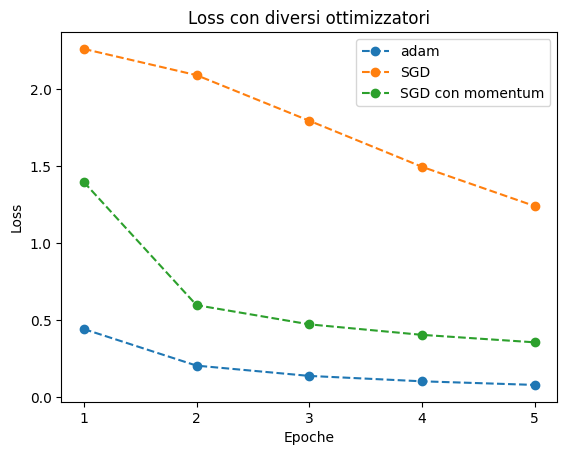

In [ ]:
#Training con diversi ottimizzatori
x = [1, 2, 3, 4, 5]
xi = [1, 2, 3, 4 , 5]

fig, ax=plt.subplots()
ax.plot(x, loss3, label = "adam",marker='o', linestyle='--') # modello con attivazine adam già allenato
ax.plot(x, loss_sgd, label = "SGD",marker='o', linestyle='--')
ax.plot(x, loss_sgdm, label = "SGD con momentum",marker='o', linestyle='--')
plt.xticks(xi, x)
plt.title("Loss con diversi ottimizzatori")
plt.xlabel("Epoche")
plt.ylabel("Loss")
ax.legend()

Trainig con diversi learning rate e scheduling:

In [ ]:
# Importanza del learning rate
learning_rates = [0.0001,0.001, 0.01, 0.1]
num_epochs = 5

ThreeLayerModel = ThreeLayerModel()
criterion = nn.CrossEntropyLoss()

losses_dict = {lr: [] for lr in learning_rates}

# Allenare il modello con ciascun learning rate
for lr in learning_rates:
    print(f'Training with Learning Rate: {lr}')
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss,accuracy,pesi = train_model(model, num_epochs, trainloader, criterion, optimizer)
    losses_dict[lr].append(loss)


Training with Learning Rate: 0.0001
Epoch: 1 | Loss: 0.9308 | Train Accuracy: 73.5776 | Time: 17.63
Epoch: 2 | Loss: 0.5199 | Train Accuracy: 84.6685 | Time: 15.03
Epoch: 3 | Loss: 0.4282 | Train Accuracy: 87.1198 | Time: 14.59
Epoch: 4 | Loss: 0.3678 | Train Accuracy: 89.1309 | Time: 14.44
Epoch: 5 | Loss: 0.3243 | Train Accuracy: 90.5133 | Time: 14.33
Training with Learning Rate: 0.001
Epoch: 1 | Loss: 0.2880 | Train Accuracy: 91.3387 | Time: 14.33
Epoch: 2 | Loss: 0.1878 | Train Accuracy: 94.4487 | Time: 14.47
Epoch: 3 | Loss: 0.1347 | Train Accuracy: 95.9729 | Time: 18.20
Epoch: 4 | Loss: 0.1024 | Train Accuracy: 96.8366 | Time: 15.12
Epoch: 5 | Loss: 0.0798 | Train Accuracy: 97.5053 | Time: 14.32
Training with Learning Rate: 0.01
Epoch: 1 | Loss: 0.3612 | Train Accuracy: 89.5861 | Time: 14.58
Epoch: 2 | Loss: 0.3047 | Train Accuracy: 91.7006 | Time: 15.19
Epoch: 3 | Loss: 0.2773 | Train Accuracy: 92.7828 | Time: 15.21
Epoch: 4 | Loss: 0.2492 | Train Accuracy: 93.6633 | Time: 15.42

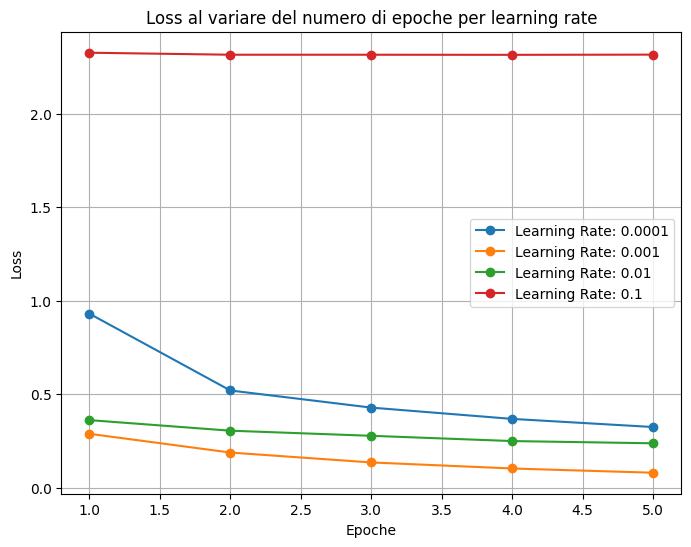

In [ ]:
# Plot of loss with different learning rates

plt.figure(figsize=(8, 6))
for i, lr in enumerate(learning_rates):
    losses = losses_dict[lr][0]
    plt.plot(range(1, num_epochs + 1), losses, marker='o', label=f'Learning Rate: {lr}')

plt.title('Loss al variare del numero di epoche per learning rate')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Exponential Scheduler 

SchedulerModel = ThreeLayerModel()
optimizer = torch.optim.Adam(SchedulerModel.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
criterion = nn.CrossEntropyLoss()
losses = []

for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = SchedulerModel(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader)
    losses.append(epoch_loss)
    print(f"Epoca {epoch+1}; Loss: {epoch_loss}")
    scheduler.step()

Epoca 1; Loss: 0.4409391036470731
Epoca 2; Loss: 0.19650108494957289
Epoca 3; Loss: 0.13423196877936522
Epoca 4; Loss: 0.0979146150107185
Epoca 5; Loss: 0.07129572463249788
Epoca 6; Loss: 0.050318432795939345
Epoca 7; Loss: 0.03678658574009314
Epoca 8; Loss: 0.025998933402037558
Epoca 9; Loss: 0.017591689817631657
Epoca 10; Loss: 0.01195406652407643


In [ ]:
model = ThreeLayerModel()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

loss_sgd, accuracy_sgd, W_SGD = train_model(model, 10, trainloader, criterion, optimizer)

Epoch: 1 | Loss: 0.4434 | Train Accuracy: 86.8346 | Time: 14.69
Epoch: 2 | Loss: 0.2024 | Train Accuracy: 93.9568 | Time: 14.59
Epoch: 3 | Loss: 0.1388 | Train Accuracy: 95.9162 | Time: 14.42
Epoch: 4 | Loss: 0.1015 | Train Accuracy: 97.0167 | Time: 14.57
Epoch: 5 | Loss: 0.0783 | Train Accuracy: 97.6938 | Time: 14.92
Epoch: 6 | Loss: 0.0620 | Train Accuracy: 98.1357 | Time: 15.42
Epoch: 7 | Loss: 0.0501 | Train Accuracy: 98.3825 | Time: 16.19
Epoch: 8 | Loss: 0.0394 | Train Accuracy: 98.7793 | Time: 14.80
Epoch: 9 | Loss: 0.0361 | Train Accuracy: 98.9011 | Time: 14.57
Epoch: 10 | Loss: 0.0285 | Train Accuracy: 99.0928 | Time: 14.93


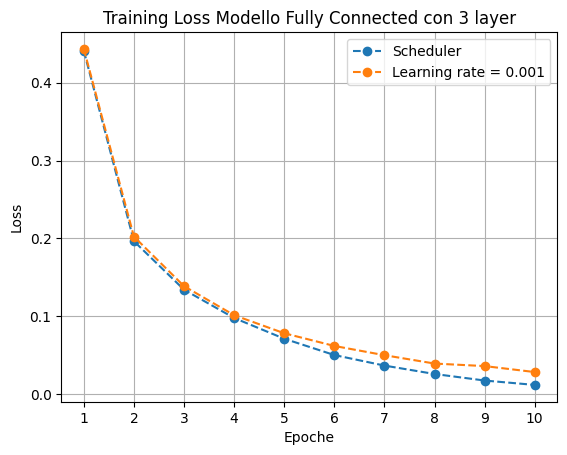

In [ ]:
# Plot della loss con lo scheduler del learning rate vs no scheduler
epochs = [1,2,3,4,5,6,7,8,9,10]
fig, ax=plt.subplots()
ax.plot(epochs, losses, label = "Scheduler",marker='o', linestyle='--')
ax.plot(epochs, loss_sgd, label = "Learning rate = 0.001",marker='o', linestyle='--')
plt.title('Training Loss Modello Fully Connected con 3 layer')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.grid(True)
ax.legend()

4. For a model (not necessarily the best performing one), plot training loss vs testing loss and training accuracy vs testing accuracy, and comment on what you see.


In [8]:
def train_and_test_model(model, trainloader, testloader, criterion, optimizer, epochs, device):
    model.to(device)
    train_results = {'accuracy': [], 'loss': []}
    test_results = {'accuracy': [], 'loss': []}

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0

        for data, target in trainloader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

        train_results['loss'].append(train_loss / len(trainloader))
        train_results['accuracy'].append(100 * correct / total)

        # Testing phase
        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for data, target in testloader:
                data, target = data.to(device), target.to(device)
                outputs = model(data)
                loss = criterion(outputs, target)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        test_results['loss'].append(test_loss / len(testloader))
        test_results['accuracy'].append(100 * correct / total)

    return train_results, test_results

In [9]:
def plot_train_test_results(train_results, test_results, title):
    epochs = range(1, len(train_results['accuracy']) + 1)

    plt.figure(figsize=(14, 7))

    # Plotting accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_results['accuracy'], 'go-', label='Training Accuracy')
    plt.plot(epochs, test_results['accuracy'], 'ro-', label='Testing Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_results['loss'], 'go-', label='Training Loss')
    plt.plot(epochs, test_results['loss'], 'ro-', label='Testing Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.suptitle('Train vs Test')
    plt.show()

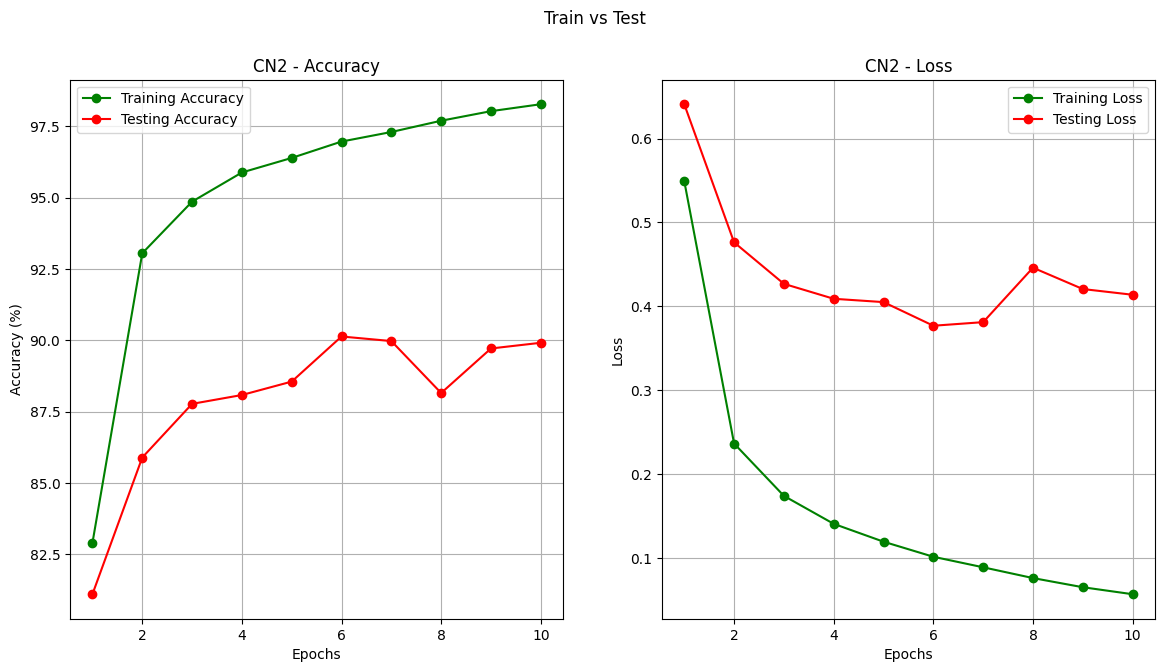

Train: {'accuracy': [82.89833333333333, 93.04666666666667, 94.855, 95.87666666666667, 96.38666666666667, 96.96, 97.295, 97.69, 98.025, 98.26833333333333], 'loss': [0.5493178234696389, 0.23651866915822028, 0.1740957855383555, 0.14076583508079252, 0.11946993048749864, 0.10150411550266047, 0.08895835208812107, 0.07610953023231899, 0.06520553242371728, 0.05685858960878104]}, Test: {'accuracy': [81.1, 85.89, 87.77, 88.08, 88.55, 90.13, 89.97, 88.15, 89.71, 89.91], 'loss': [0.6409950975578623, 0.47633390208355153, 0.42687269376394466, 0.40905642945069476, 0.4050920898386369, 0.3769217096536923, 0.3812018945283545, 0.44610680457049856, 0.4206810975239014, 0.41385494177036297]}


In [10]:
models = [CN2()]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = torch.nn.CrossEntropyLoss()

for model in models:
    optimizer = torch.optim.Adam(model.parameters())
    train_res, test_res = train_and_test_model(model, trainloader, testloader, criterion, optimizer, 10, device)
    plot_train_test_results(train_res, test_res, type(model).__name__)
